In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import numpy
import scipy
from mpl_toolkits.mplot3d import Axes3D
from skimage import measure
from matplotlib.widgets import Slider
print(scipy.__version__)

0.18.1


### Workshop Agenda
1. Simple Class and Lambdas
* Matrix Multiplication
    * Timing
    * Profile and Debug
*  Polyfit
* Jupyter
    * Root Finding
    * Curve Fitting
    * Hydrogen Atom
    * Images, Fourier Transforms, SVD

### Timing Stuff with %timeit
%timeit is one of the built in 'magic' commands in Jupyter. You can list all the available magics with %lsmagic

### Root Finding
Let's begin with some root finding - we'll use the [scipy.optimize.brentq](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.brentq.html) routine to find the zeros of a function.

<IPython.core.display.Javascript object>


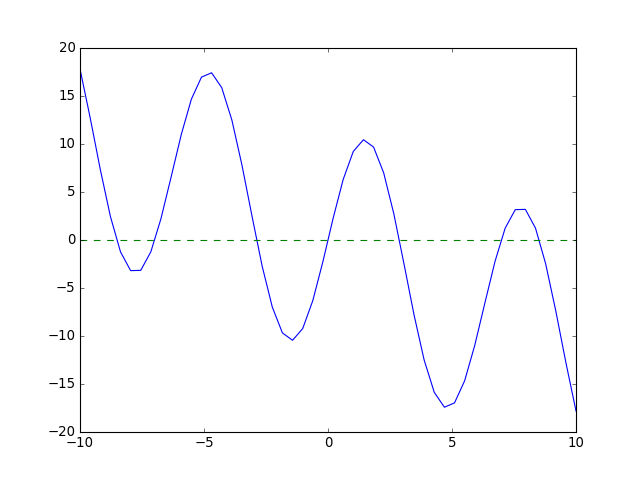

In [3]:
def crazy_function(x, s):
    return s**3*numpy.sin(x)+numpy.tan(s)*x

s=2.3
x = numpy.linspace(-10,10,50)
plt.figure()
plt.plot(x, crazy_function(x,s))
plt.plot(x, numpy.zeros_like(x),'--')
plt.show()

### Curve Fitting
Now we'll try to fit some noisy data to our favorite function with [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).

### Hydrogen Wavefunctions
The wavefunctions of the Hydrogen atom are given by:
$$ \psi_{nlm}=\sqrt{\left( \frac{2}{na}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]^3}}e^{-r/na}\left( \frac{2r}{na} \right)^l \left[ L_{n-l-1}^{2l+1}(2r/na)\right]Y_l^m(\theta,\phi)$$
Let's set $a=1$, and try to obtain 3D plots of the density isosurfaces.

In [4]:
def hydrogen_wf(n,l,m,X,Y,Z):
    R = numpy.sqrt(X**2+Y**2+Z**2)
    Theta = numpy.arccos(Z/R)
    Phi = numpy.arctan2(Y,X)
    
    rho = 2.*R/n
    #Need special functions!
    
    prefactor = numpy.sqrt((2./n)**3*math.factorial(n-l-1)/(2.*n*math.factorial(n+l)))
    
    wf = prefactor*numpy.exp(-rho/2.)*rho**l*s_harm*l_poly
    wf = numpy.nan_to_num(wf)
    return wf

In [5]:
dz=0.5
zmin=-10
zmax=10
x = numpy.arange(zmin,zmax,dz)
y = numpy.arange(zmin,zmax,dz)
z = numpy.arange(zmin,zmax,dz)


<IPython.core.display.Javascript object>


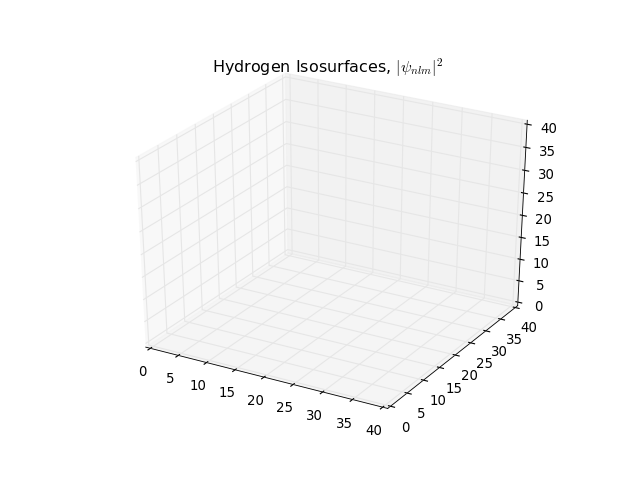

NameError: name 'data' is not defined

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([0,len(x)])
ax.set_ylim([0,len(y)])
ax.set_zlim([0,len(z)])
ax.set_title(r"Hydrogen Isosurfaces, $|\psi_{nlm}|^2$")
max_val = numpy.max(data)



### Displaying Images, Fourier Tranforms, SVD
We can change the resolution of an image by Fourier Transforming or taking the SVD. By removing high frequency data or small singular values, we get a lower resolution image.  This can be used for image compression.


In [11]:
image=mpimg.imread('Lichtenstein_img_processing_test.png')

<IPython.core.display.Javascript object>


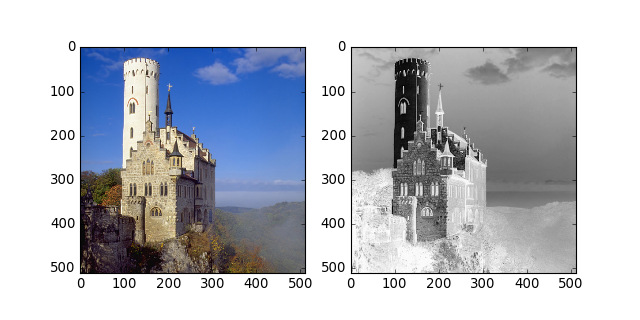

In [12]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
image_bw = (image[:,:,1] + image[:,:,0]+  image[:,:,2])/3
plt.imshow(image_bw,cmap='Greys')

In [7]:
image_fft = numpy.fft.rfft2(image_bw)


NameError: name 'image_bw' is not defined

<IPython.core.display.Javascript object>


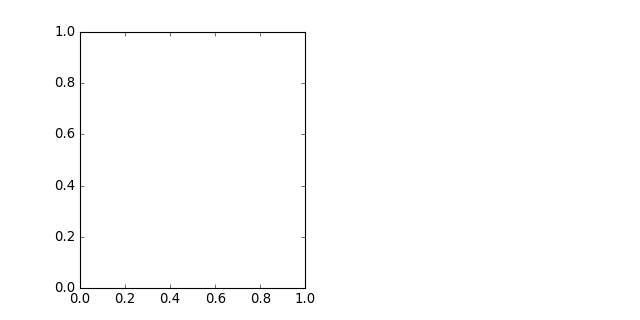

NameError: name 'image_bw' is not defined

In [8]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(image_bw,cmap='Greys')
plt.subplot(122)
plt.imshow(image_ifft,cmap='Greys')

<IPython.core.display.Javascript object>


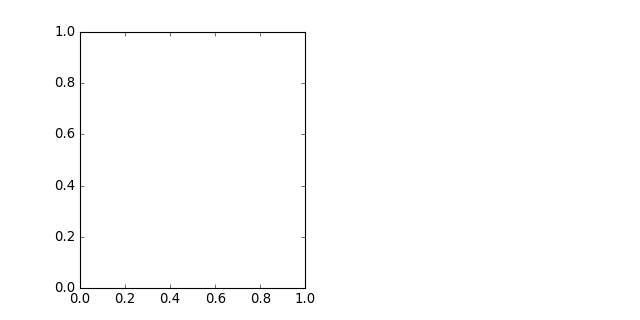

NameError: name 'image_bw' is not defined

In [9]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(image_bw,cmap='Greys')
plt.subplot(122)
plt.imshow(image_reconstructed,cmap='Greys')
plt.title("Removed "+str(sing_size-max_sing)+" of "+str(sing_size)+" SVs")